In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/samruddhii04/Data-Science-Assignments/refs/heads/main/Random%20Forest/glass.csv")

In [19]:
df

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.replace(0,np.nan,inplace=True)

In [7]:
df.isna().sum()

RI        0
Na        0
Mg       42
Al        0
Si        0
K        30
Ca        0
Ba      176
Fe      144
Type      0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

<Axes: >

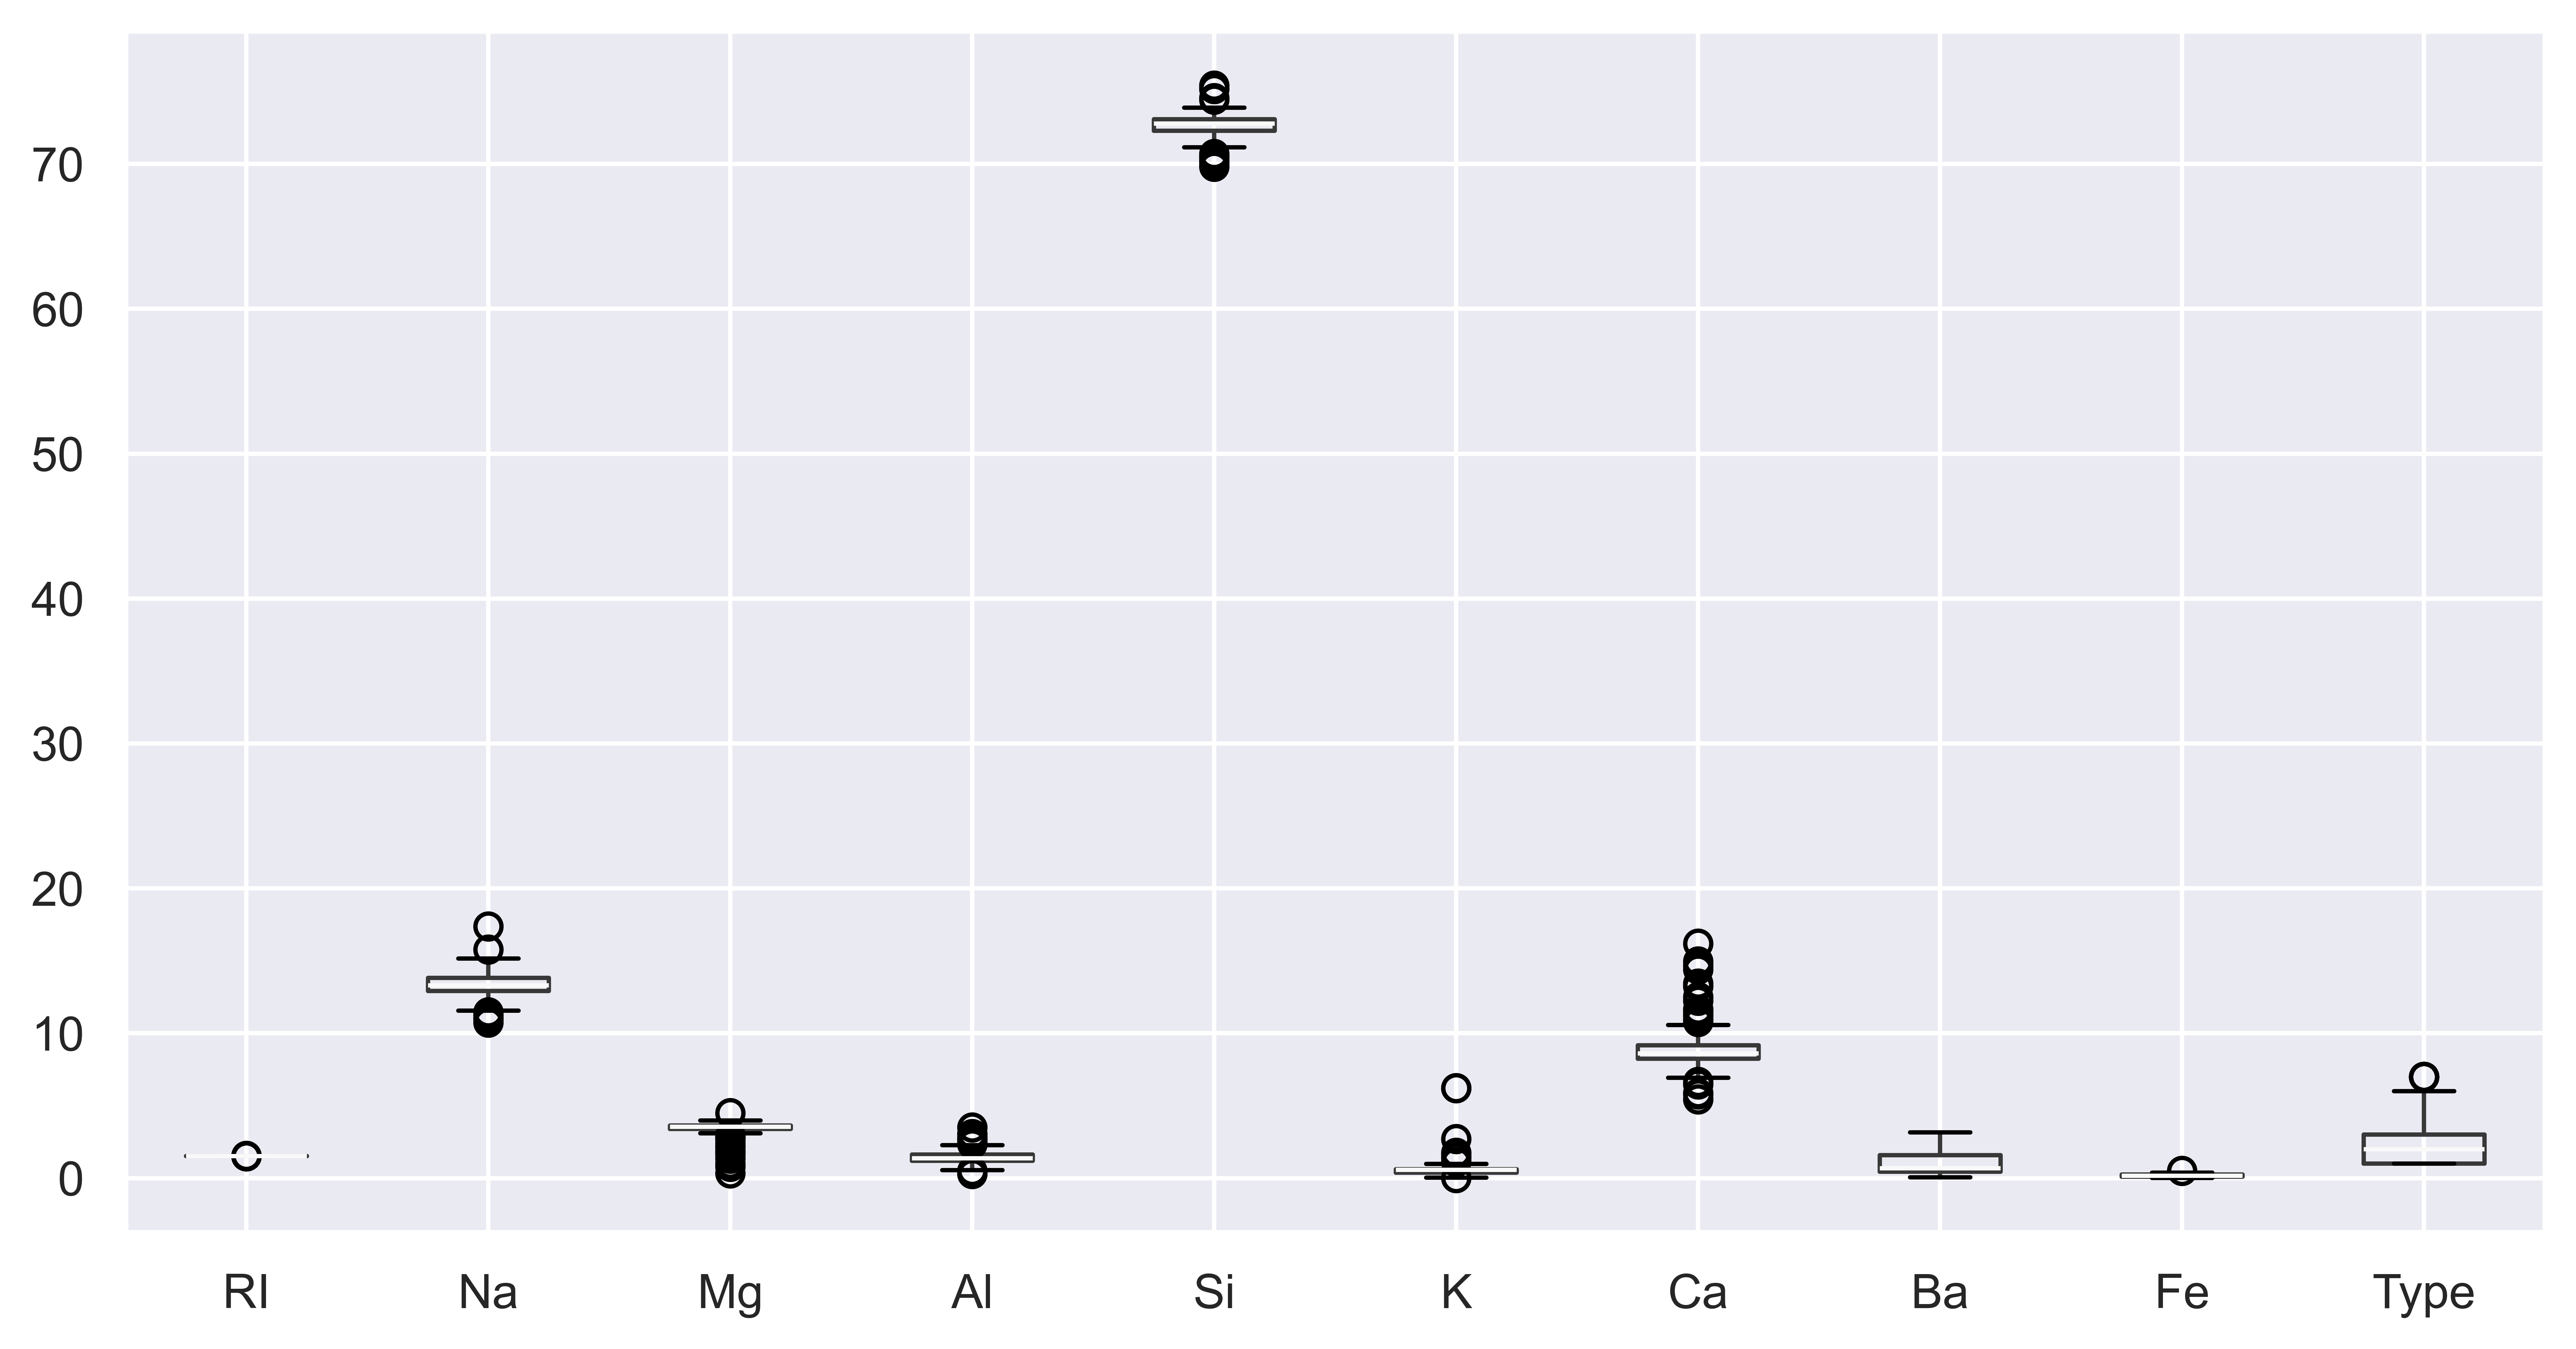

In [9]:
df.boxplot()

In [10]:
si = SimpleImputer(strategy='median')

In [11]:
df[['Mg','K','Ba','Fe']] = si.fit_transform(df[['Mg','K','Ba','Fe']])

In [12]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.490,1.10,71.78,0.06,8.75,0.68,0.165,1
1,1.51761,13.89,3.600,1.36,72.73,0.48,7.83,0.68,0.165,1
2,1.51618,13.53,3.550,1.54,72.99,0.39,7.78,0.68,0.165,1
3,1.51766,13.21,3.690,1.29,72.61,0.57,8.22,0.68,0.165,1
4,1.51742,13.27,3.620,1.24,73.08,0.55,8.07,0.68,0.165,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,3.535,2.88,72.61,0.08,9.18,1.06,0.165,7
210,1.51685,14.92,3.535,1.99,73.06,0.57,8.40,1.59,0.165,7
211,1.52065,14.36,3.535,2.02,73.42,0.57,8.44,1.64,0.165,7
212,1.51651,14.38,3.535,1.94,73.61,0.57,8.48,1.57,0.165,7


In [13]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

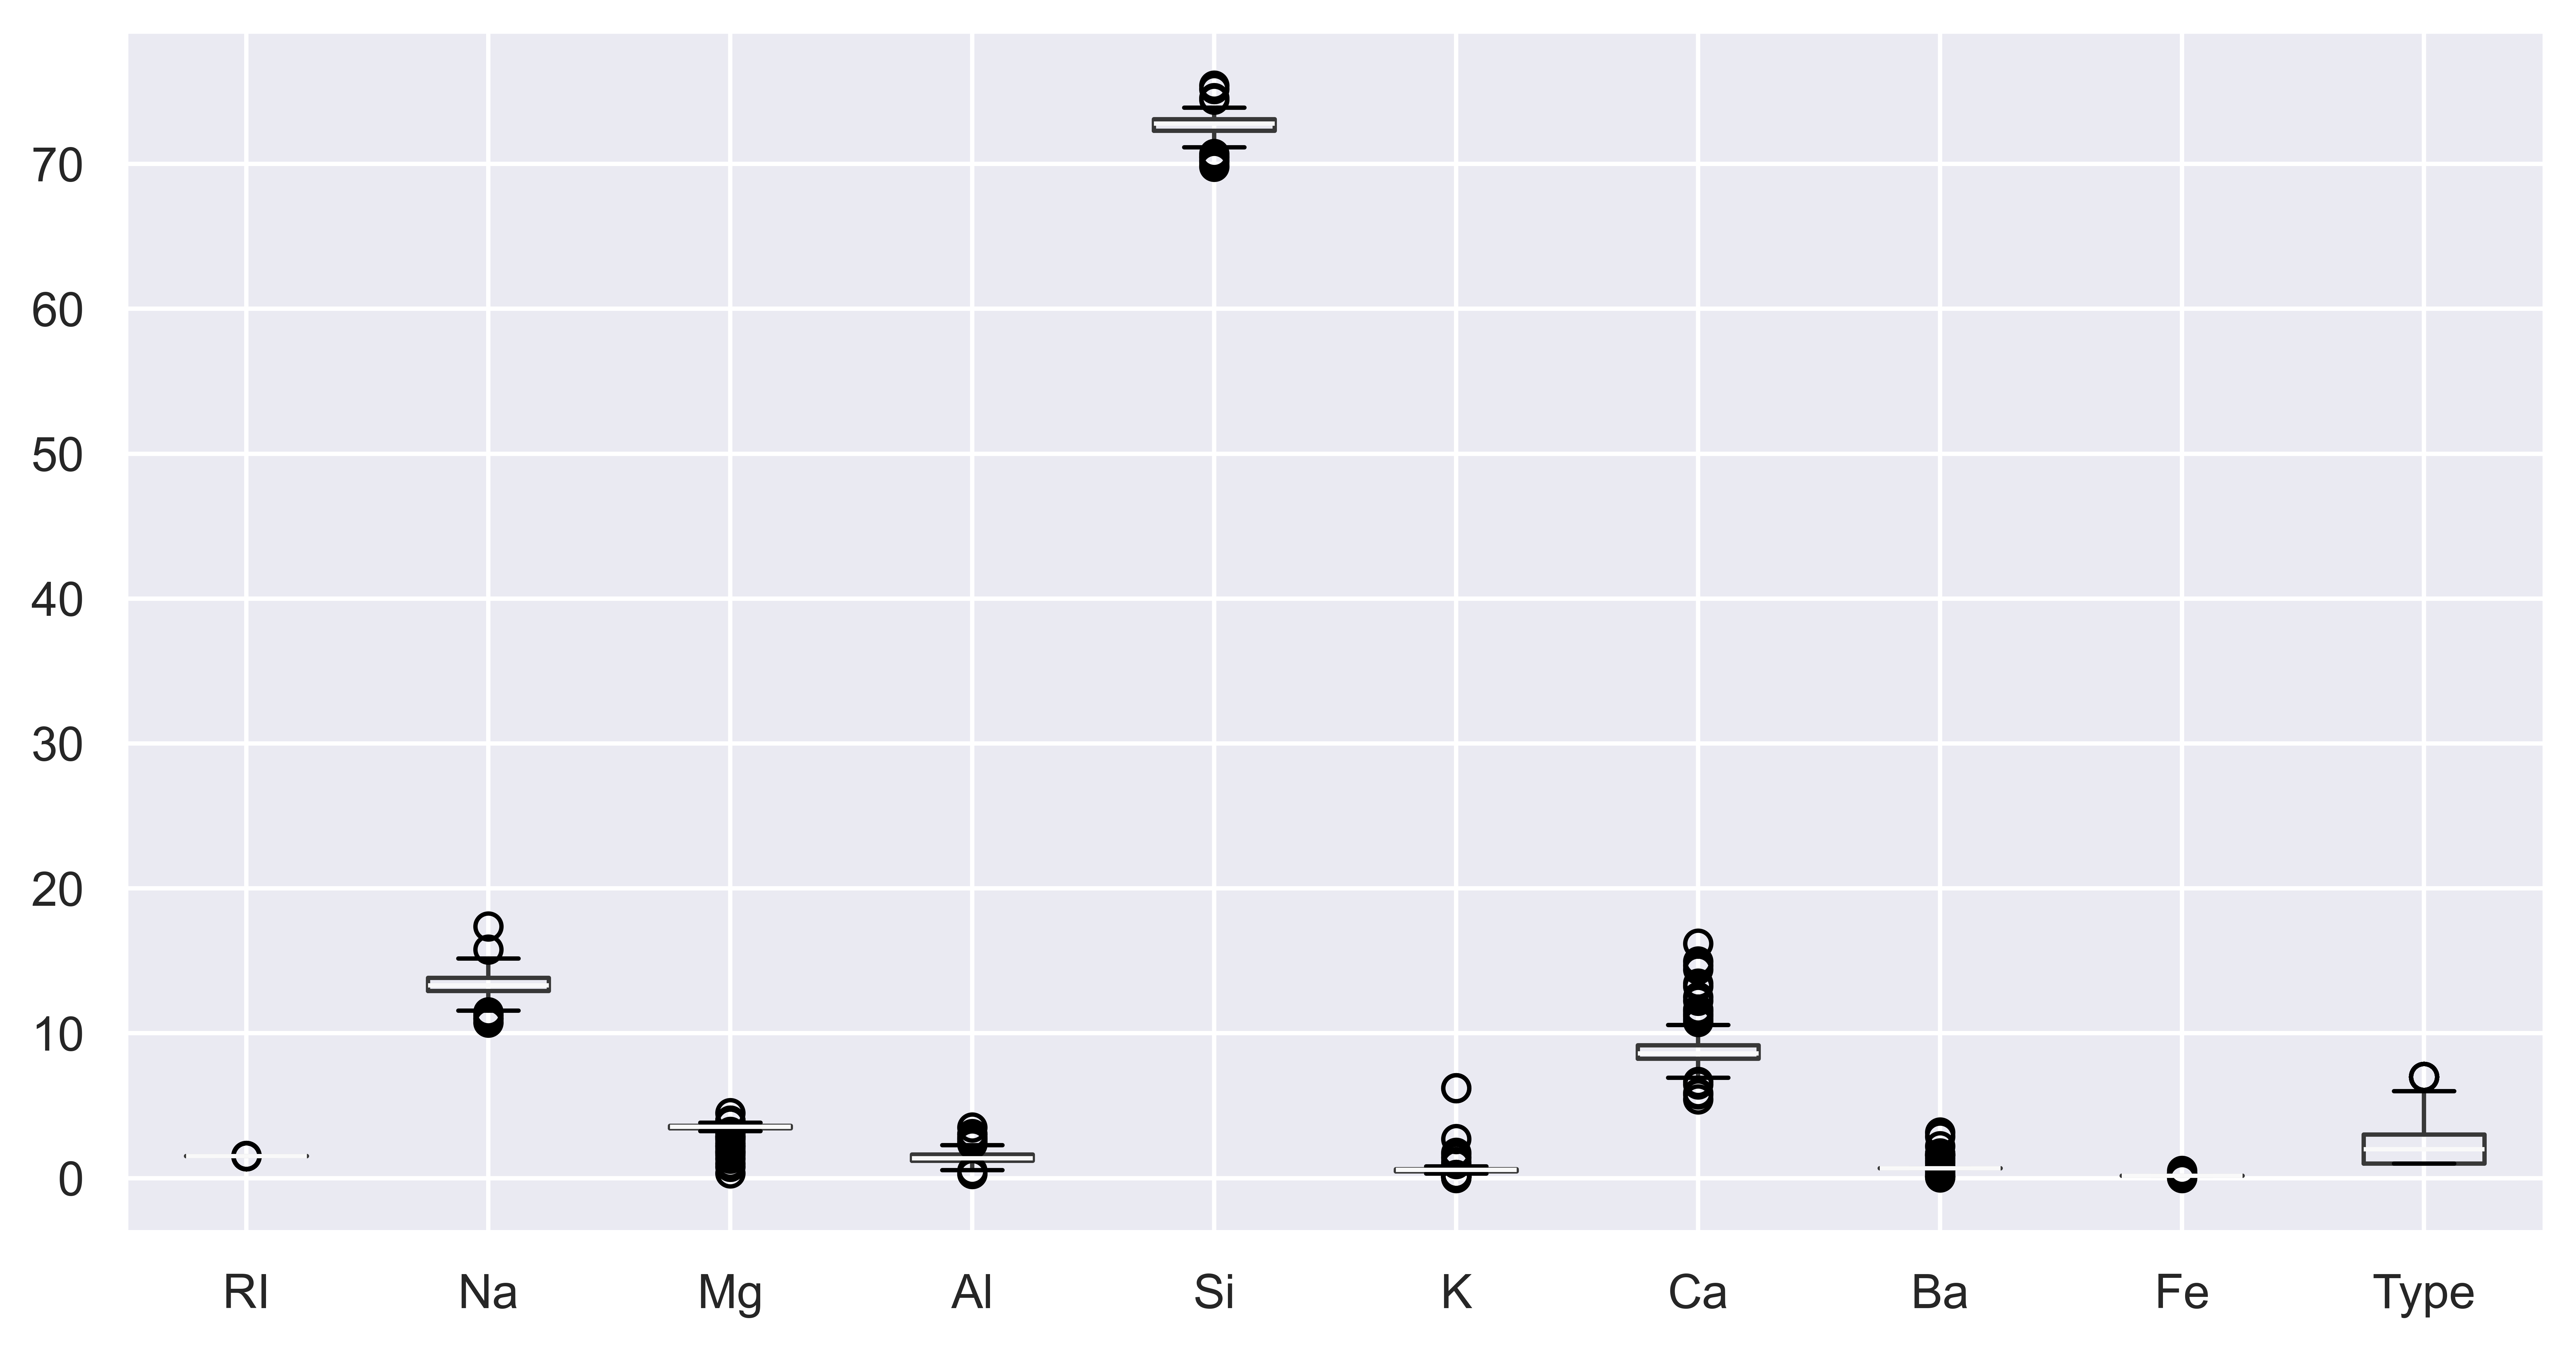

In [14]:
df.boxplot()
plt.show()

In [15]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
        
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
                
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [16]:
outlier_detection(df,df.columns)

In [17]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,3.83625,1.10,71.78,0.26625,8.75,0.68,0.165,1.0
1,1.51761,13.89,3.60000,1.36,72.73,0.48000,7.83,0.68,0.165,1.0
2,1.51618,13.53,3.55000,1.54,72.99,0.39000,7.78,0.68,0.165,1.0
3,1.51766,13.21,3.69000,1.29,72.61,0.57000,8.22,0.68,0.165,1.0
4,1.51742,13.27,3.62000,1.24,73.08,0.55000,8.07,0.68,0.165,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,3.53500,2.29,72.61,0.26625,9.18,0.68,0.165,6.0
210,1.51685,14.92,3.53500,1.99,73.06,0.57000,8.40,0.68,0.165,6.0
211,1.52065,14.36,3.53500,2.02,73.42,0.57000,8.44,0.68,0.165,6.0
212,1.51651,14.38,3.53500,1.94,73.61,0.57000,8.48,0.68,0.165,6.0


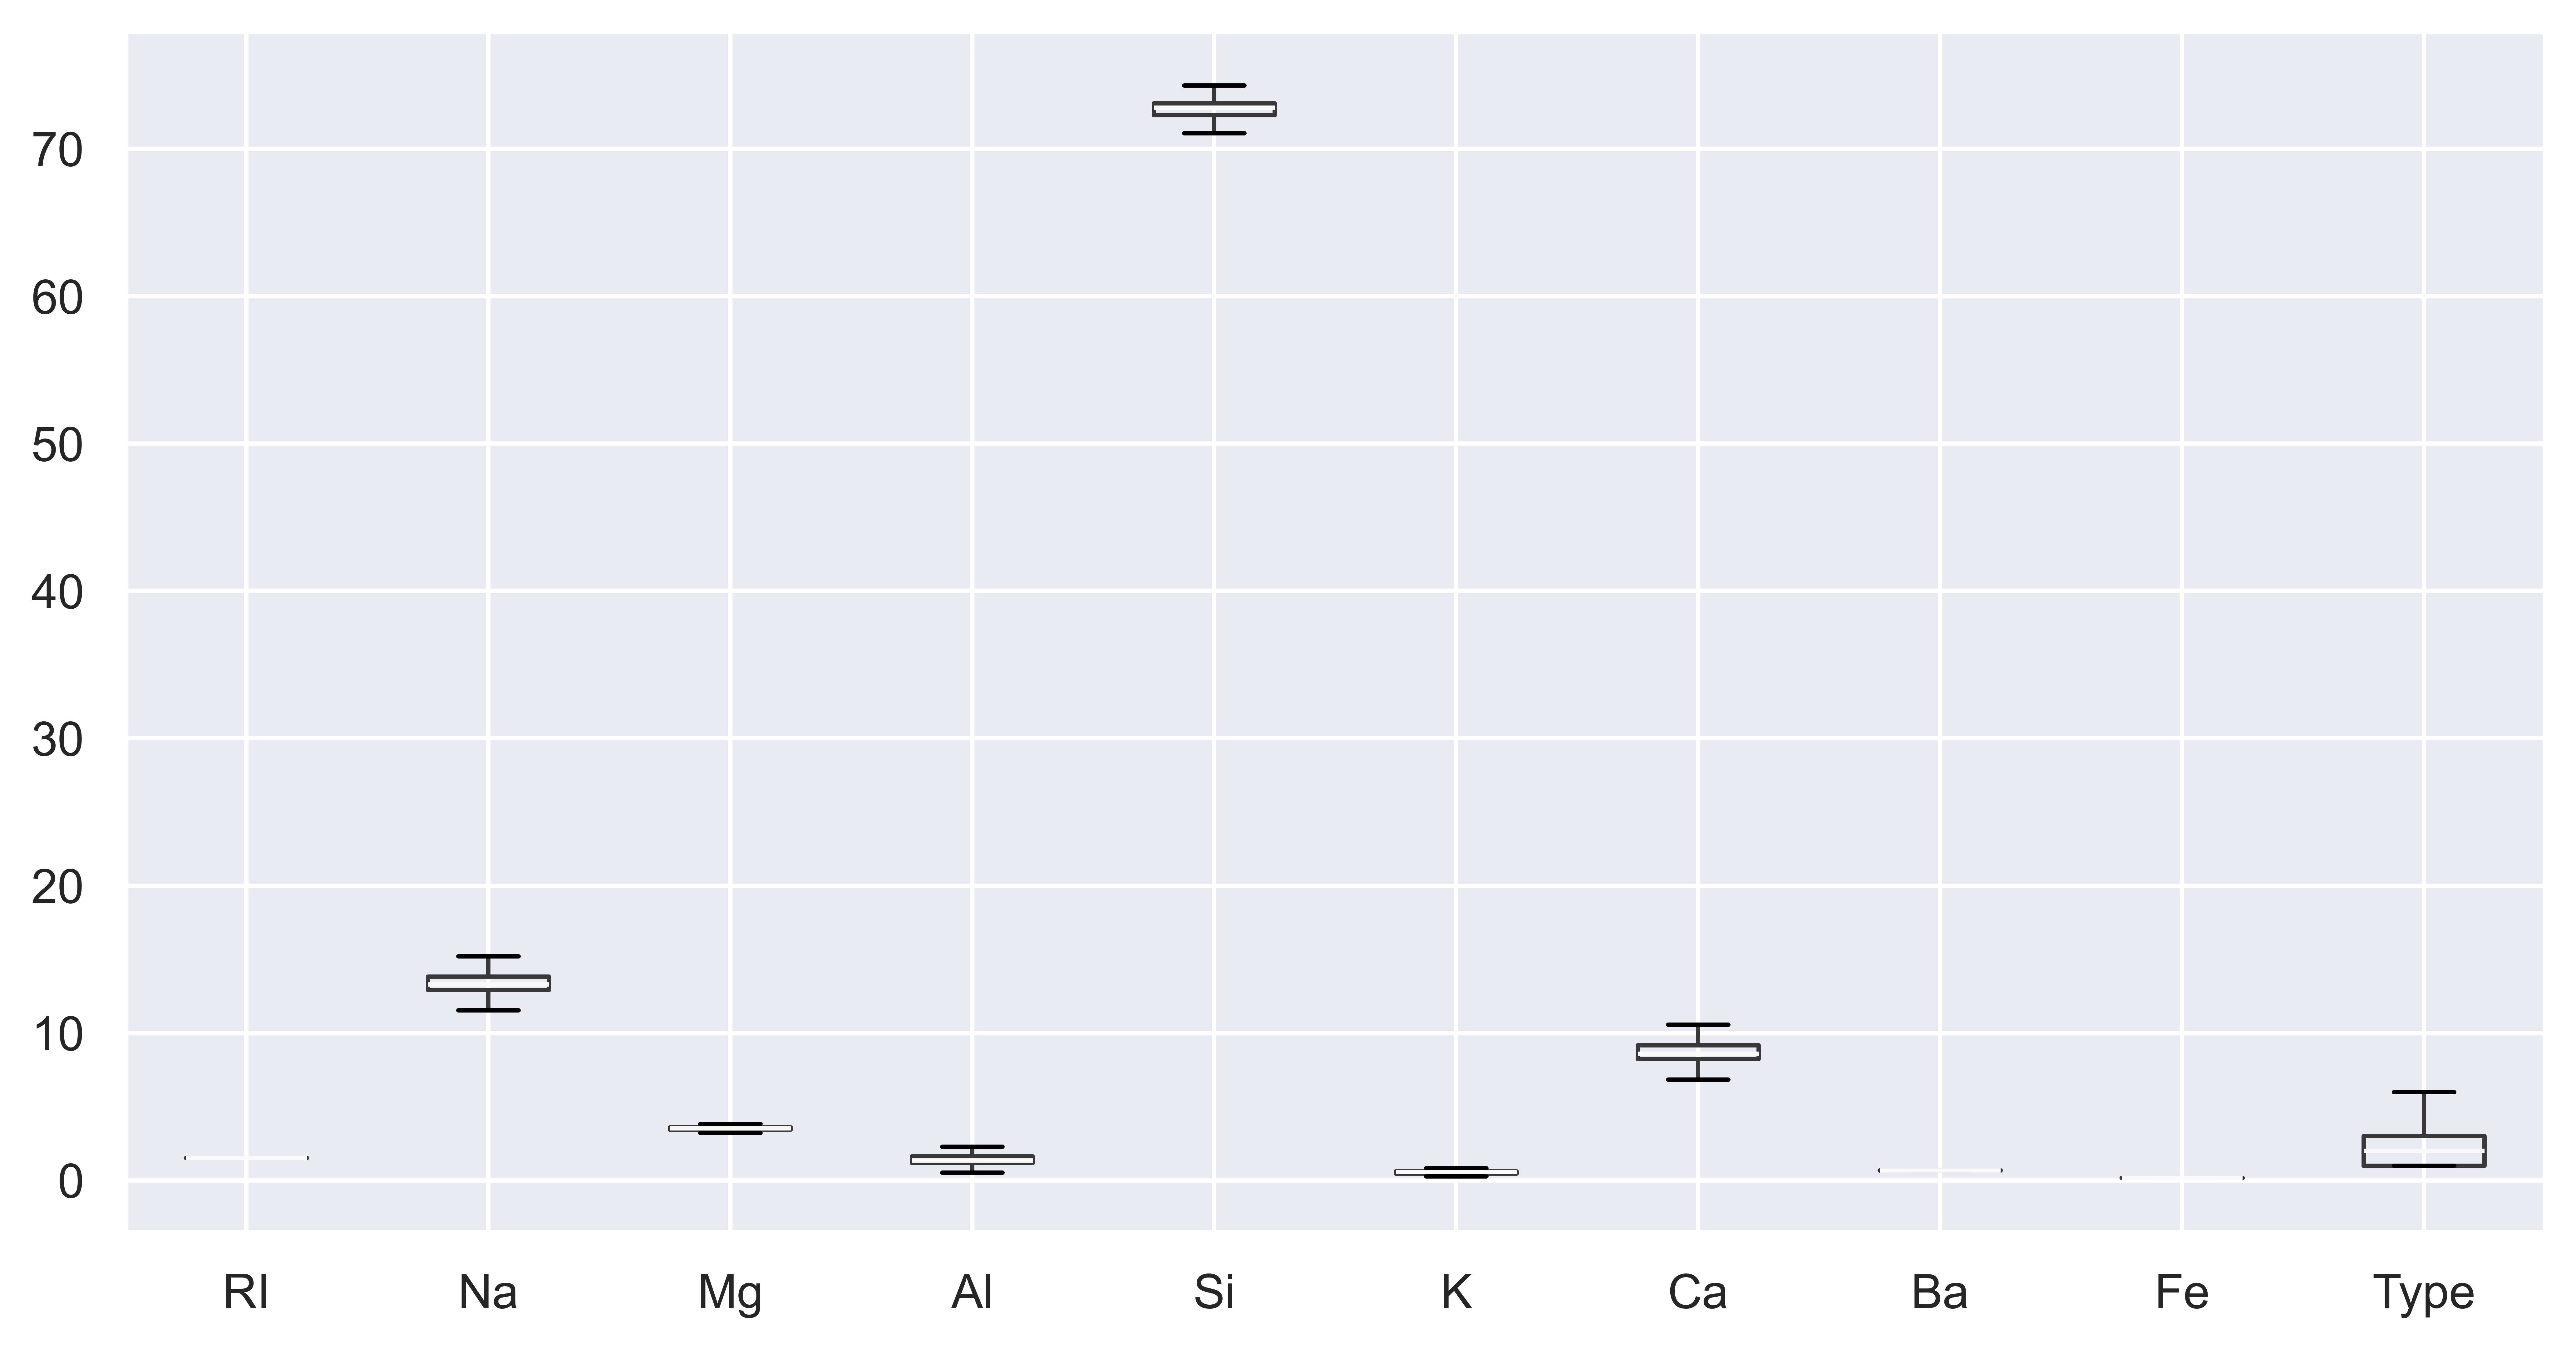

In [18]:
df.boxplot()
plt.show()

In [19]:
x = df.iloc[:,:-1]
y = df['Type']

In [20]:
x_ = x.columns

In [21]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [23]:
rfc = RandomForestClassifier()

In [24]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [25]:
ypred = rfc.predict(xtest)

In [26]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

         1.0       0.89      0.81      0.85        21
         2.0       0.75      0.75      0.75        12
         3.0       0.17      0.50      0.25         2
         5.0       1.00      1.00      1.00         1
         6.0       1.00      0.71      0.83         7

    accuracy                           0.77        43
   macro avg       0.76      0.75      0.74        43
weighted avg       0.84      0.77      0.79        43



In [27]:
len(rfc.estimators_)

100

In [28]:
cn = [str(cls) for cls in df['Type'].unique()]

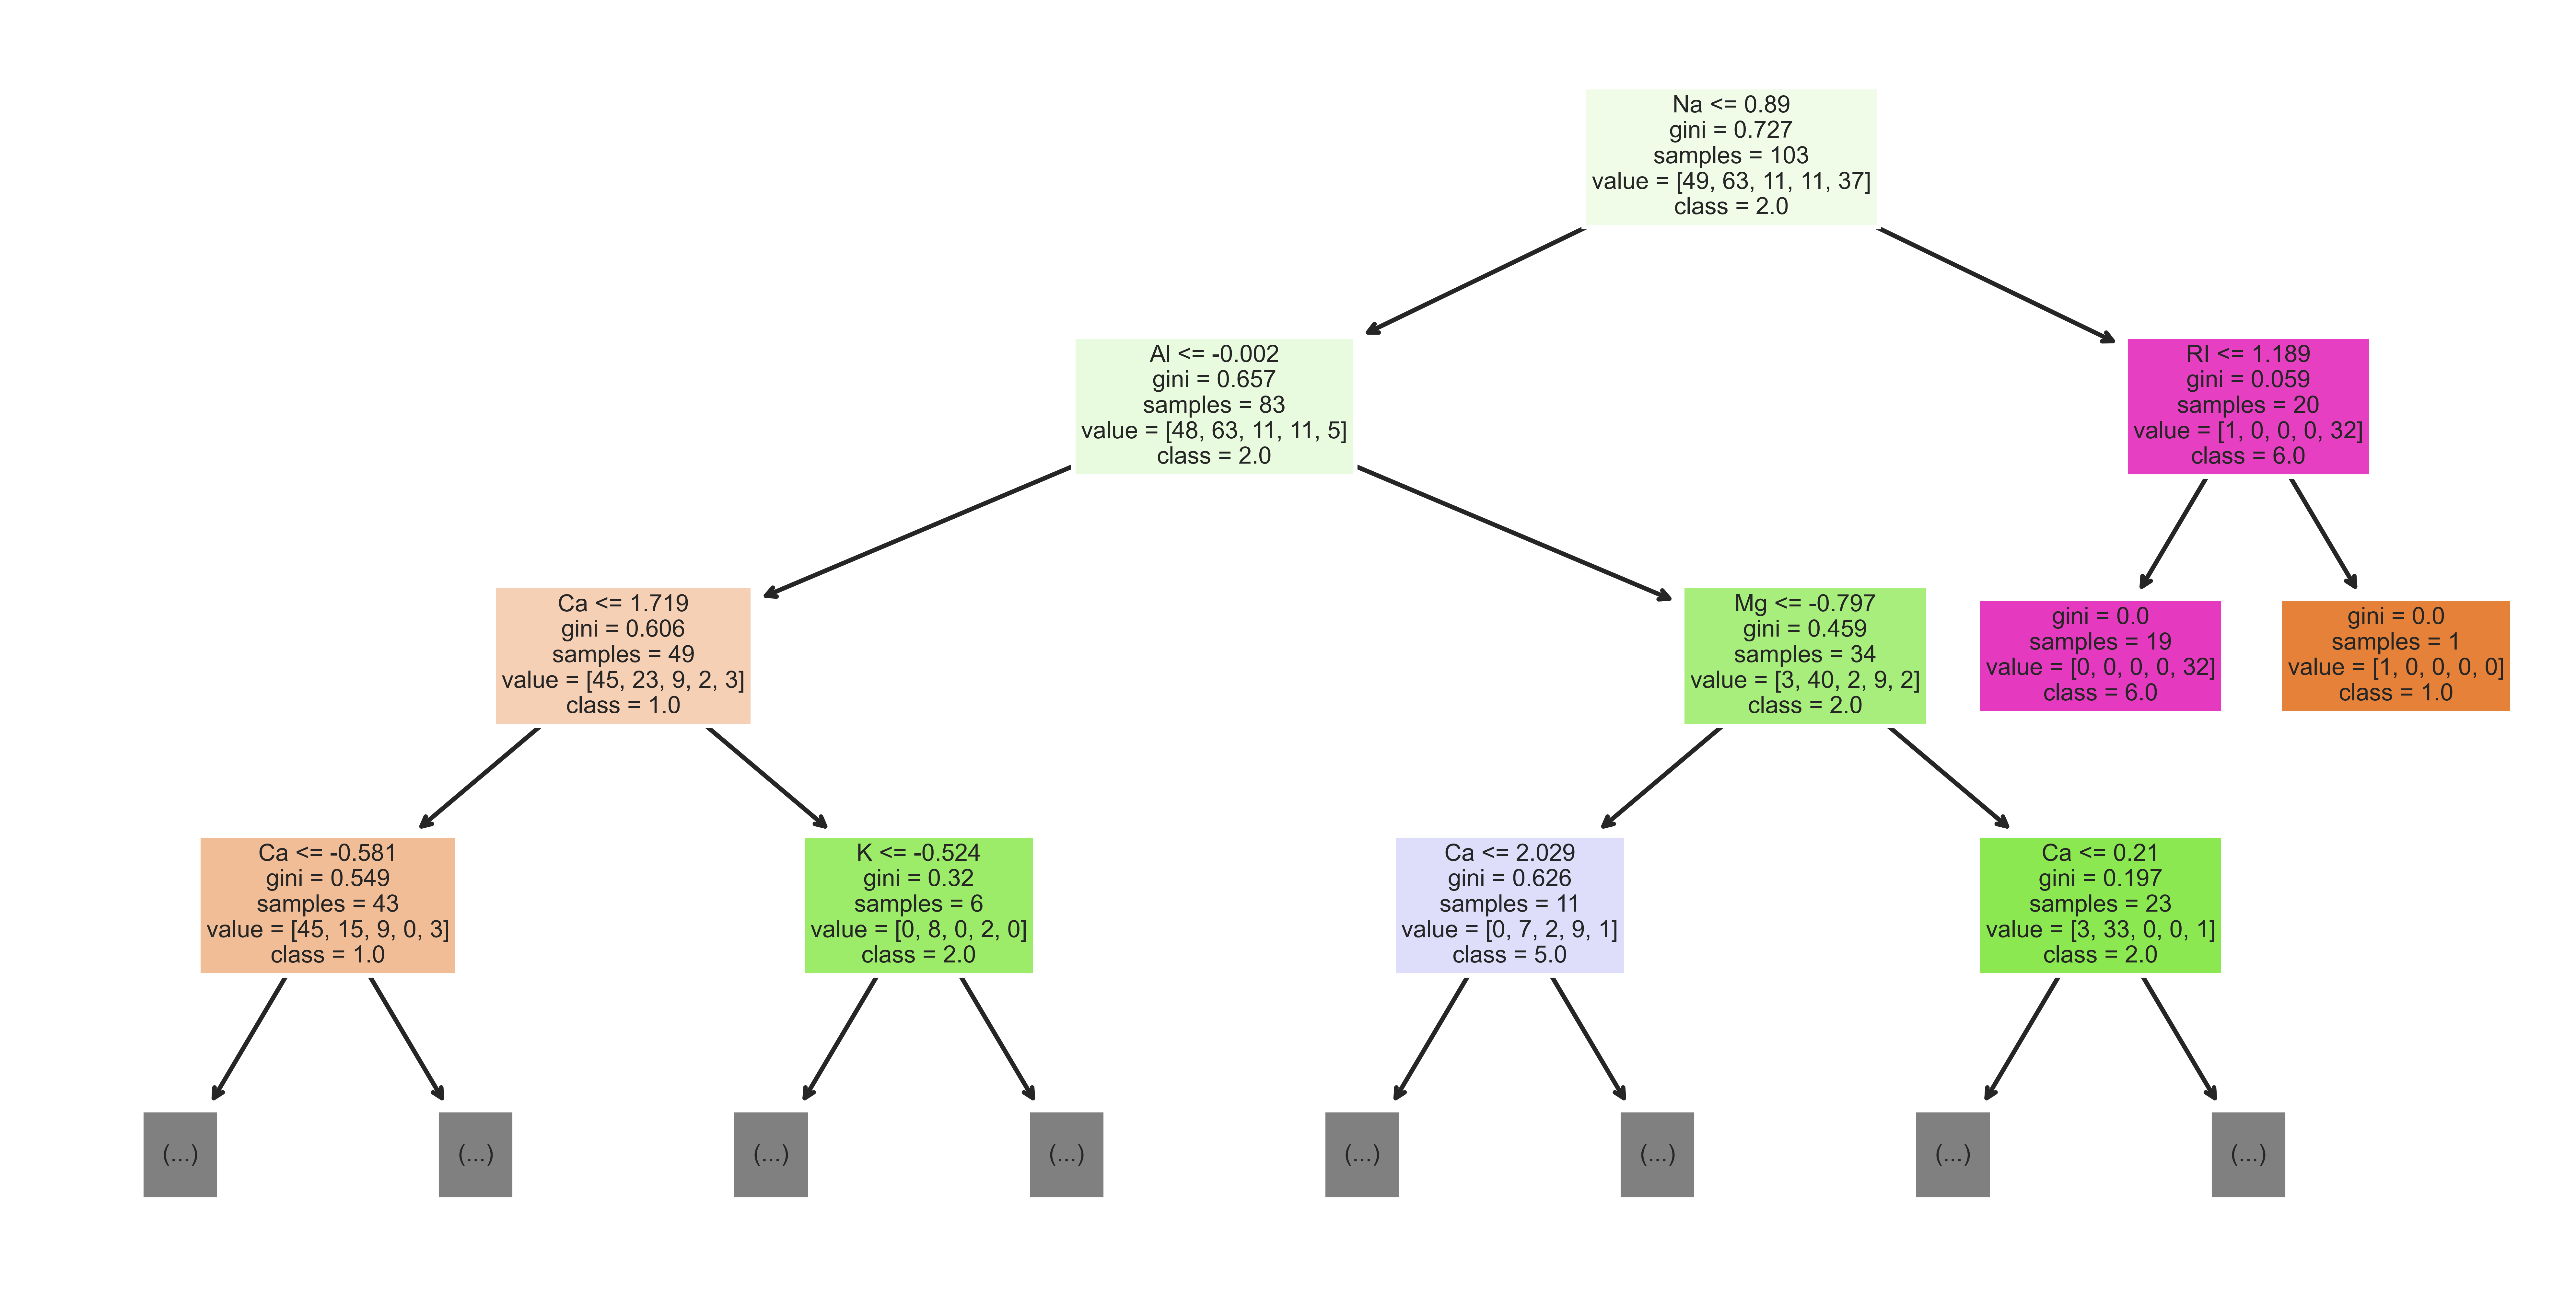

In [29]:
tree.plot_tree(rfc.estimators_[75], feature_names=x_,
               class_names=cn,
               filled=True , max_depth=3)
plt.show()

In [30]:
bagging = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),n_estimators=10, random_state=4)

In [31]:
bagging.fit(xtrain,ytrain)
ypred1 = bagging.predict(xtest)

In [32]:
print(classification_report(ypred1,ytest))

              precision    recall  f1-score   support

         1.0       0.89      0.81      0.85        21
         2.0       0.75      0.69      0.72        13
         3.0       0.00      0.00      0.00         1
         5.0       1.00      1.00      1.00         1
         6.0       1.00      0.71      0.83         7

    accuracy                           0.74        43
   macro avg       0.73      0.64      0.68        43
weighted avg       0.85      0.74      0.79        43



In [33]:
boosting = AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42),n_estimators=10, random_state=42)

In [34]:
boosting.fit(xtrain,ytrain)
ypred2 = boosting.predict(xtest)

In [35]:
print(classification_report(ypred2,ytest))

              precision    recall  f1-score   support

         1.0       0.89      0.81      0.85        21
         2.0       0.75      0.75      0.75        12
         3.0       0.17      0.50      0.25         2
         5.0       1.00      1.00      1.00         1
         6.0       1.00      0.71      0.83         7

    accuracy                           0.77        43
   macro avg       0.76      0.75      0.74        43
weighted avg       0.84      0.77      0.79        43



## Random Forest and Boosting algorithm got the same accuracy which is 77%
## And Bagging got less accuracy which is 74%

# Additional Quesions

# 1. Explain Bagging and Boosting methods. How is it different from each other.
## Ans : Bagging is used to train all the models at the same time while Boosting train the models in sequence. Bagging takes the average of all the models trained to give the accuracy while Boosting takes the previous model trained errors so that next time it reduces the errors so it increases accuracy after each sequential model trained..

# 2. Explain how to handle imbalance in the data.
## Ans : Preprocess the data by handling missing values along with treating the outliers.Tune the data so it get the proper parameters to train.Check the accuracy with parameters like precision, recall, f1 score. Also use the row and column sampling for better feature selection.